In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Линейная регрессия:

In [ ]:
import numpy as np

# создание данных
x_t = np.linspace(0.1, 5, 100)  # 100 значений от 0.1 до 5
a = 2.0
b = 2.0
y_t = a * x_t + b

# шум (epsilon из пары)
df = 3  # кол. степеней свободы
noise = np.random.standard_t(df, size=100)
scale = 0.7  # масштаб шума
y_noisy = y_t + scale * noise

x = x_t
y = y_noisy

In [ ]:
np.mean(noise)

0.014908655877376878

In [ ]:
# Рассчет дисперсии
var_y_t = np.var(y_t)
var_noise = np.var(noise)
var_y = np.var(y)

print("Дисперсия y_t:", var_y_t)
print("Дисперсия noise:", var_noise)
print("Дисперсия y (y_t + noise):", var_y)

Дисперсия y_t: 8.165016835016836
Дисперсия noise: 3.85537172830449
Дисперсия y (y_t + noise): 10.182199137330487


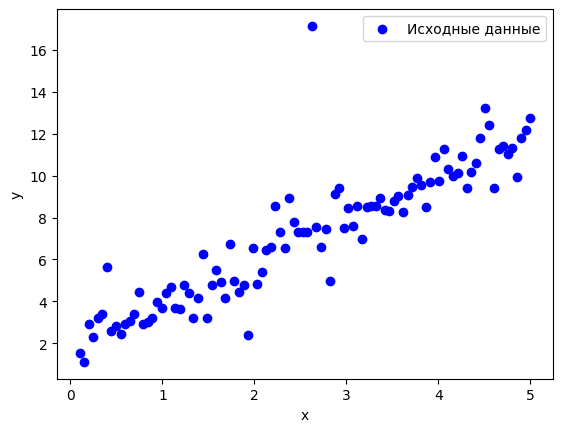

In [ ]:
plt.scatter(x, y, label='Исходные данные', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Вычисление a и b

In [ ]:
n = len(x)
numerator_a = np.sum(x * y) - (np.sum(x) * np.sum(y)) / n
denominator_a = np.sum(x ** 2) - (np.sum(x) ** 2) / n
a = numerator_a / denominator_a

numerator_b = np.sum(y) - a * np.sum(x)
b = numerator_b / n

print("a =", a)
print("b =", b)

# Минимизация функции потерь
regression_values = a * x + b
loss = np.sum((y - regression_values) ** 2)
print("Loss (S) =", loss)

a = 2.0156827791089555
b = 1.9704449723863275
Loss (S) = 188.86301012935246


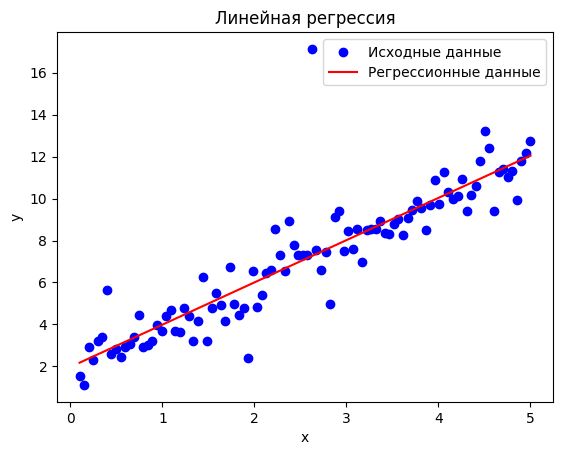

In [ ]:
# графики
plt.scatter(x, y, label='Исходные данные', color='blue')
plt.plot(x, regression_values, label='Регрессионные данные', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Линейная регрессия')
plt.show()

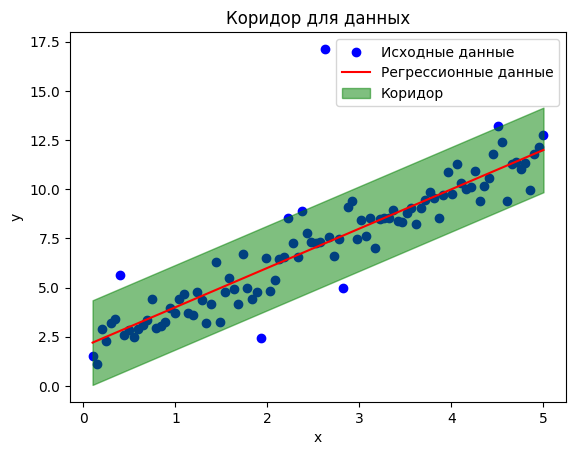

In [ ]:
from scipy.stats import norm

# ср. кв. отколнение
std_dev = np.std(y)
conf_level = 0.5 # 0.95

# квантили для верхней и нижней границы коридора
alpha = 1 - conf_level
upper_limit = y_t + std_dev * norm.ppf(1 - alpha / 2)
lower_limit = y_t - std_dev * norm.ppf(1 - alpha / 2)

plt.scatter(x, y, label='Исходные данные', color='blue')
plt.plot(x, y_t, label='Регрессионные данные', color='red', linestyle='-')
plt.fill_between(x, lower_limit, upper_limit, color='green', alpha=0.5, label='Коридор')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Коридор для данных')
plt.show()

### Тест Дарбина-Уотсона (Автокорреляция)




$ dw=\frac{\sum_{i=2}^{n}\left(e_i-e_{i-1}\right)^2}{\sum_{i=1}^{n}e_i^2} $

Ссылка на таблицу: https://real-statistics.com/statistics-tables/durbin-watson-table/

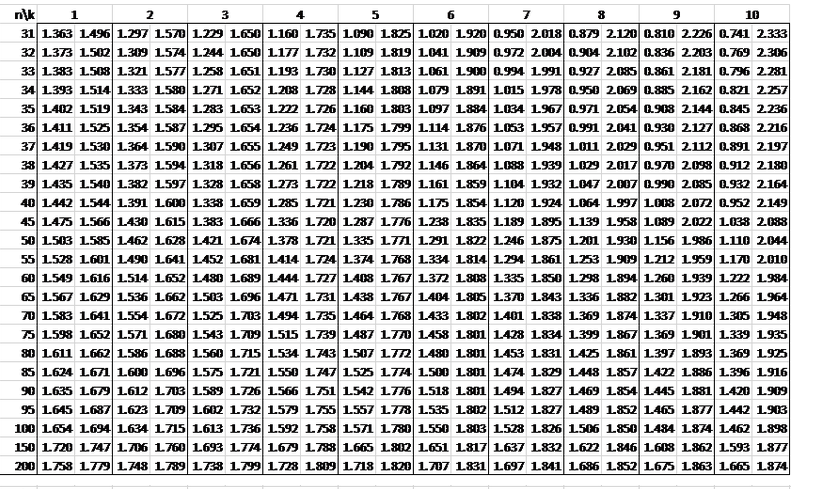

In [ ]:
from scipy import stats

resid = y - regression_values

n = len(resid)
numerator = sum([(resid[i] - resid[i - 1])**2 for i in range(1, n)])
denominator = sum(resid**2)

dw = numerator / denominator

alpha = 0.05  # ур. значимости
n = len(resid)
k = 2  # количество коэф. (a, b)

# критические значения (из таблицы)
critical_value_lower = 1.634
critical_value_upper = 1.715

# Вывод результатов
print("Тест Дарбина-Уотсона:")
print(f"Статистика теста (DW): {dw}")
print(f"Уровень значимости: {alpha}")
print(f'Количество регрессоров (объясняющие переменные): {k}')
print("Критическое значение (нижнее):", critical_value_lower)
print("Критическое значение (верхнее):", critical_value_upper)
# Проверка наличия (+) автокорреляции
if dw < critical_value_lower:
    print("Есть статистические доказательства положительной автокорреляции")
elif dw > critical_value_upper:
    print("Нет статистических доказательств положительной автокорреляции")
else:
    print("Тест не дает однозначного результата (неубедительный)")

# Проверка наличия (-) автокорреляции
if 4 - dw < critical_value_lower:
    print("Есть статистические доказательства отрицательной автокорреляции")
elif 4 - dw > critical_value_upper:
    print("Нет статистических доказательств отрицательной автокорреляции")
else:
    print("Тест не дает однозначного результата (неубедительный)")

Тест Дарбина-Уотсона:
Статистика теста (DW): 1.887888219691176
Уровень значимости: 0.05
Количество регрессоров (объясняющие переменные): 2
Критическое значение (нижнее): 1.634
Критическое значение (верхнее): 1.715
Нет статистических доказательств положительной автокорреляции
Нет статистических доказательств отрицательной автокорреляции


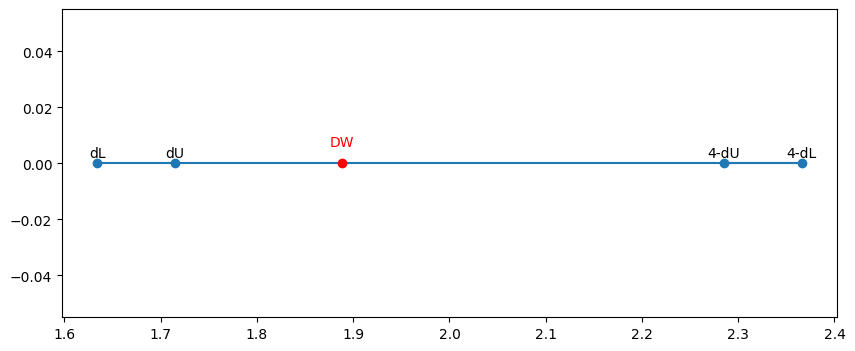

In [ ]:
x_values = [critical_value_lower, critical_value_upper, 4 - critical_value_lower, 4 - critical_value_upper]

# точки
plt.figure(figsize=(10, 4))
plt.plot(x_values, [0] * len(x_values), marker='o')
labels = ['dL', 'dU', '4-dL', '4-dU']

# подписи
for i in range(len(x_values)):
    plt.text(x_values[i], 0.001, labels[i], ha='center', va='bottom')

# dw красным
plt.plot(dw, 0, marker='o', color='red')
plt.text(dw, 0.005, 'DW', ha='center', va='bottom', color='red')
plt.show()

    Значение статистики близкое к 2 - отсутствие автокорреляции (независимость) остатков
    Значение близкое к 0 - положительная автокорреляция
    Значение близкое к 4 - отрицательная автокорреляция

### Проверка регрессионных значений и фактических данных ($R^2$)

In [ ]:
y_mean = np.mean(y)

# Рассчитываем сумму квадратов отклонений наблюдаемых значений от их среднего
ssr = np.sum((regression_values - y_mean)**2)

# Рассчитываем сумму квадратов отклонений фактических наблюдаемых значений от предсказанных
sse = np.sum((y - regression_values)**2)

r_squared = ssr / (ssr + sse)

print(f"R-squared: {r_squared}")

R-squared: 0.8145164835394615


    Если R близок к 1, это означает, что модель хорошо соответствует данным, и предсказанные значения близки к фактическим данным.
    Если R близок к 0, это означает, что модель плохо соответствует данным, и предсказанные значения далеки от фактических данных.

## Параболлическая регрессия:

In [ ]:
import numpy as np

# создание данных
x_t = np.linspace(-6, 6, 100)  # 100 значений от 0.1 до 5
a = -2.0
b = 2.0
c = 2.0
y_t = a * x_t**2 + b * x_t  + c

# шум (epsilon из пары)
df = 3  # кол. степеней свободы
noise = np.random.standard_t(df, size=100)
scale = 2  # масштаб шума
y_noisy = y_t + scale * noise

x = x_t
y = y_noisy

In [ ]:
np.mean(noise)

-0.021616924843588407

In [ ]:
# Рассчет дисперсии
var_y_t = np.var(y_t)
var_noise = np.var(noise)
var_y = np.var(y)

print("Дисперсия y_t:", var_y_t)
print("Дисперсия noise:", var_noise)
print("Дисперсия y (y_t + noise):", var_y)

Дисперсия y_t: 528.4320449675822
Дисперсия noise: 2.8008185785085744
Дисперсия y (y_t + noise): 540.436436143319


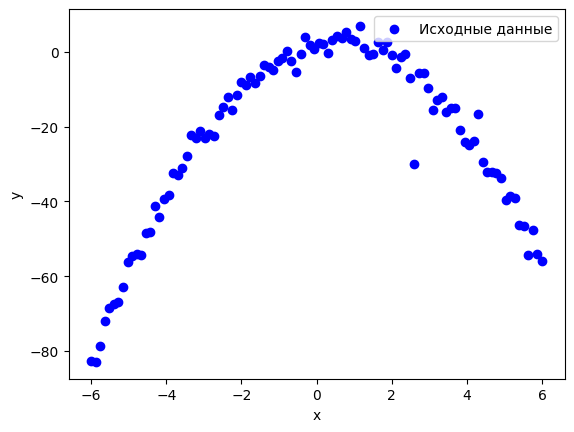

In [ ]:
plt.scatter(x, y, label='Исходные данные', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
from scipy.optimize import minimize

# функция потерь с помощью суммы частных
def loss(params):
    a, b, c = params
    da = -2 * np.sum(x**2 * (y - (a * x**2 + b * x + c)))
    db = -2 * np.sum(x * (y - (a * x**2 + b * x + c)))
    dc = -2 * np.sum(y - (a * x**2 + b * x + c))
    return da**2 + db**2 + dc**2

guess = [1.0, 1.0, 1.0]

# Минимизация функции потерь
result = minimize(loss, guess, method='L-BFGS-B') # итеративный метод оптимизации с ограничением по памяти

# получение оптимальных значений a, b и c и суммы квадратов ошибок
a_opt, b_opt, c_opt = result.x

# переопределение функции потерь, чтобы получить сумму квадратов ошибок
def loss(params):
    a, b, c = params
    predicted_y = a * x**2 + b * x + c
    error = y - predicted_y
    return np.sum(error**2)

f_loss = loss([a_opt, b_opt, c_opt])

print("a =", a_opt)
print("b =", b_opt)
print("c =", c_opt)
print("Сумма квадратов ошибок =", f_loss)

a = -1.9912281100225853
b = 2.10228079679729
c = 1.8494124877765101
Сумма квадратов ошибок = 1106.597101017487


In [ ]:
regression_values = a_opt * x**2 + b_opt * x + c_opt

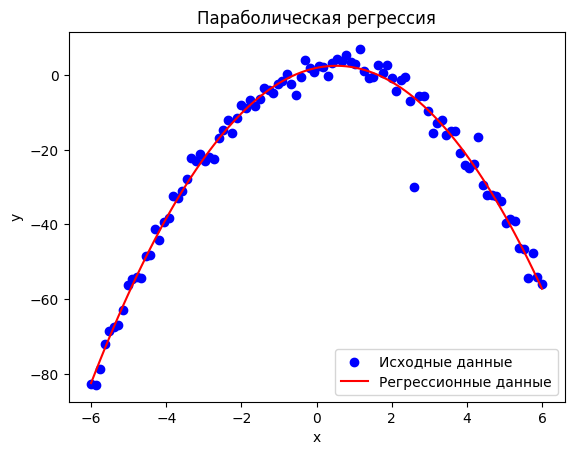

In [ ]:
# Графики
plt.scatter(x, y, label='Исходные данные', color='blue')
plt.plot(x, regression_values, label='Регрессионные данные', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Параболическая регрессия')
plt.show()

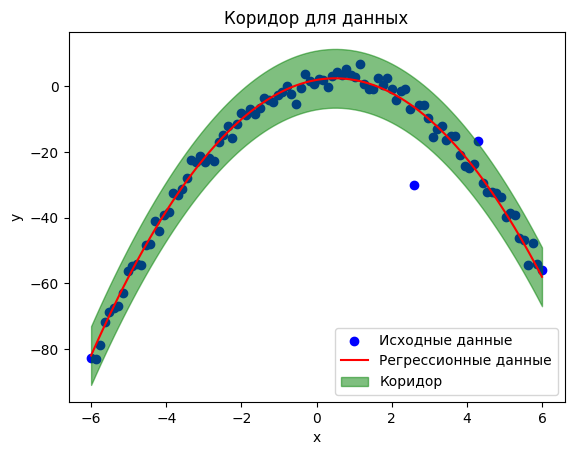

In [ ]:
from scipy.stats import norm

# ср. кв. отколнение
std_dev = np.std(y)
conf_level = 0.3 # 0.95

# квантили для верхней и нижней границы коридора
alpha = 1 - conf_level
upper_limit = y_t + std_dev * norm.ppf(1 - alpha / 2)
lower_limit = y_t - std_dev * norm.ppf(1 - alpha / 2)

plt.scatter(x, y, label='Исходные данные', color='blue')
plt.plot(x, y_t, label='Регрессионные данные', color='red', linestyle='-')
plt.fill_between(x, lower_limit, upper_limit, color='green', alpha=0.5, label='Коридор')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Коридор для данных')
plt.show()

### Тест Дарбина-Уотсона (Автокорреляция)



$ dw=\frac{\sum_{i=2}^{n}\left(e_i-e_{i-1}\right)^2}{\sum_{i=1}^{n}e_i^2} $

Ссылка на таблицу: https://real-statistics.com/statistics-tables/durbin-watson-table/

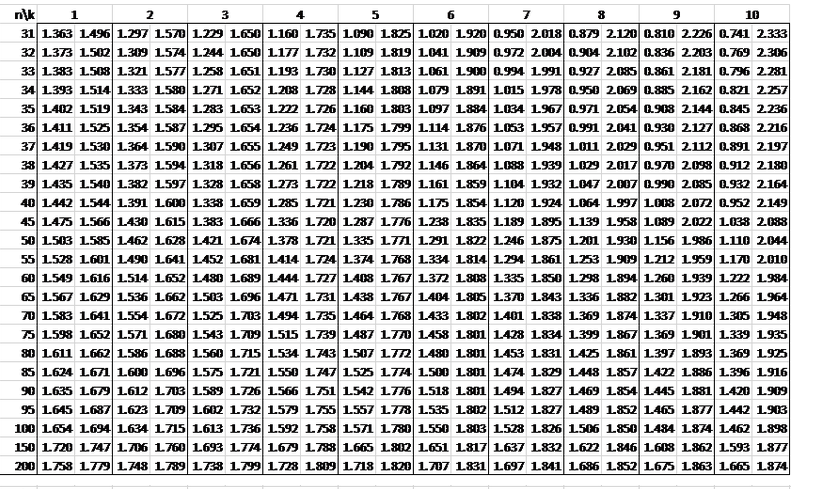

In [ ]:
from scipy import stats

resid = y - regression_values

n = len(resid)
numerator = sum([(resid[i] - resid[i - 1])**2 for i in range(1, n)])
denominator = sum(resid**2)

dw = numerator / denominator

alpha = 0.05  # ур. значимости
n = len(resid)
k = 3  # количество коэф. (a, b)

# критические значения (из таблицы)
critical_value_lower = 1.613
critical_value_upper = 1.736

# Вывод результатов
print("Тест Дарбина-Уотсона:")
print(f"Статистика теста (DW): {dw}")
print(f"Уровень значимости: {alpha}")
print(f'Количество регрессоров (объясняющие переменные): {k}')
print("Критическое значение (нижнее):", critical_value_lower)
print("Критическое значение (верхнее):", critical_value_upper)
# Проверка наличия (+) автокорреляции
if dw < critical_value_lower:
    print("Есть статистические доказательства положительной автокорреляции")
elif dw > critical_value_upper:
    print("Нет статистических доказательств положительной автокорреляции")
else:
    print("Тест не дает однозначного результата (неубедительный)")

# Проверка наличия (-) автокорреляции
if 4 - dw < critical_value_lower:
    print("Есть статистические доказательства отрицательной автокорреляции")
elif 4 - dw > critical_value_upper:
    print("Нет статистических доказательств отрицательной автокорреляции")
else:
    print("Тест не дает однозначного результата (неубедительный)")

Тест Дарбина-Уотсона:
Статистика теста (DW): 1.9232849278745172
Уровень значимости: 0.05
Количество регрессоров (объясняющие переменные): 3
Критическое значение (нижнее): 1.613
Критическое значение (верхнее): 1.736
Нет статистических доказательств положительной автокорреляции
Нет статистических доказательств отрицательной автокорреляции


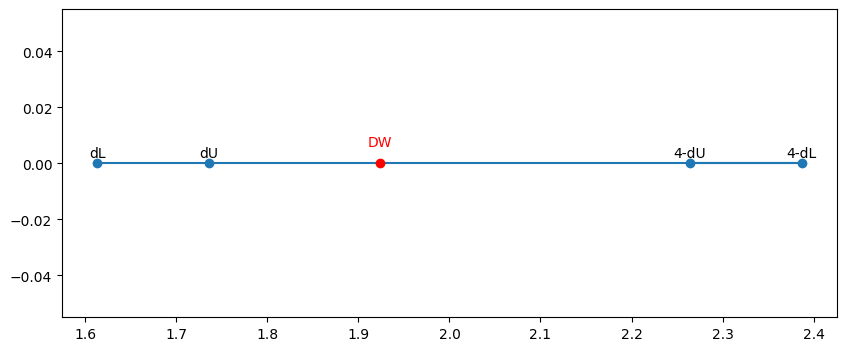

In [ ]:
x_values = [critical_value_lower, critical_value_upper, 4 - critical_value_lower, 4 - critical_value_upper]

# точки
plt.figure(figsize=(10, 4))
plt.plot(x_values, [0] * len(x_values), marker='o')
labels = ['dL', 'dU', '4-dL', '4-dU']

# подписи
for i in range(len(x_values)):
    plt.text(x_values[i], 0.001, labels[i], ha='center', va='bottom')

# dw красным
plt.plot(dw, 0, marker='o', color='red')
plt.text(dw, 0.005, 'DW', ha='center', va='bottom', color='red')
plt.show()

    Значение статистики близкое к 2 - отсутствие автокорреляции (независимость) остатков
    Значение близкое к 0 - положительная автокорреляция
    Значение близкое к 4 - отрицательная автокорреляция

### Проверка регрессионных значений и фактических данных ($R^2$)

In [ ]:
y_mean = np.mean(y)

# Рассчитываем сумму квадратов отклонений наблюдаемых значений от их среднего
ssr = np.sum((regression_values - y_mean)**2)

# Рассчитываем сумму квадратов отклонений фактических наблюдаемых значений от предсказанных
sse = np.sum((y - regression_values)**2)

r_squared = ssr / (ssr + sse)

print(f"R-squared: {r_squared}")

R-squared: 0.9795240761762772


    Если R близок к 1, это означает, что модель хорошо соответствует данным, и предсказанные значения близки к фактическим данным.
    Если R близок к 0, это означает, что модель плохо соответствует данным, и предсказанные значения далеки от фактических данных.

### old (линейная)

In [ ]:
# функция потерь
def loss(a, b, c, x, y):
    predicted_y = a * x**2 + b * x + c
    return np.sum((y - predicted_y)**2)

best_loss = float('inf')
best_a, best_b, best_c = None, None, None

# Перебор значений a, b, и c
for a in np.linspace(-6, 6, 100):
    for b in np.linspace(-6, 6, 100):
        for c in np.linspace(-6, 6, 100):
            current_loss = loss(a, b, c, x, y)
            if current_loss < best_loss:
                best_loss = current_loss
                best_a, best_b, best_c = a, b, c

print("a =", best_a)
print("b =", best_b)
print("c =", best_c)
print("Сумма квадратов ошибок =", best_loss)

a = -2.0
b = 2.0
c = 2.242424242424242
Сумма квадратов ошибок = 409.92436694544557


In [ ]:
regression_values = best_a * x**2 + best_b * x + best_c

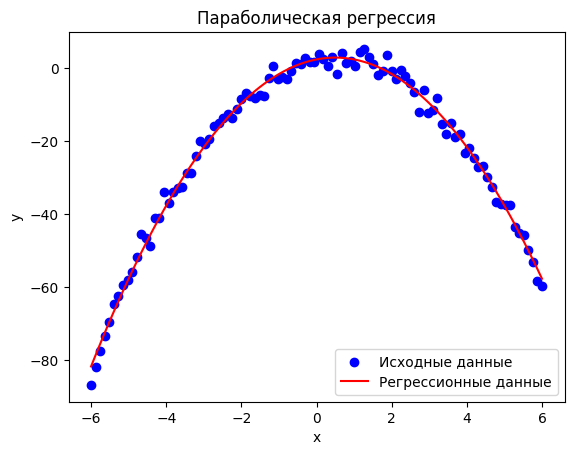

In [ ]:
# Графики
plt.scatter(x, y, label='Исходные данные', color='blue')
plt.plot(x, regression_values, label='Регрессионные данные', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Параболическая регрессия')
plt.show()